In [48]:
import stream as st
import scanpy
import numpy as np
import scipy
import pandas as pd
from matplotlib import pyplot as plt
import os
from pandas.plotting import table 
st.__version__

'1.0'

In [2]:
st.set_figure_params(dpi=80,style='white',figsize=[5.4,4.8],
                     rc={'image.cmap': 'viridis'})

#### Read in data

In [70]:
adata = scanpy.read_h5ad("analysis/STREAM/cd8_subset_Cyt.Predys.h5ad")
st.set_workdir(adata,'./stream_result')

Saving results in: ./stream_result


In [71]:
adata.obs.head()

,orig.ident,nCount_RNA,nFeature_RNA,sample,RNA_snn_res.0.8,seurat_clusters,sampleid,RNA_snn_res.1,RNA_snn_res.0.38,RNA_snn_res.4,RNA_snn_res.0.4,RNA_snn_res.0.5,RNA_snn_res.0.45,clonal,Age,detailed_annot_withCycling,MySubtype,NiceSubtype,ShortSubtype,cytotoxic,detailed_annot_withCyc.Treg.Cyto,detailed_annot,age_numeric,NMF_rank7_annot,initial_annot,sub_annot,NMF_rank8_annot,NMF_rank9_annot,NMF_rank8_annot_mergedByintersect,NMF_rank8_annot_mergedByunion,NMF_rank9_annot_mergedByunion,NMF_rank9_annot_mergedByintersect,detailed_annot_byNMFrank8_mergedByunion,naive,predysfunctional,dysfunctional,tmp,MaxNature2020Score,MaxNature2020Program,NMF_rank8_annot_mergedByunion_reAnnot,PB_variable,clonotype,Final_Annot
E60_P3_A05_E48.2_CD4.CD8._P3P4,22,999999.94,621,E48.2,4,4,E48.2,6,2,26,2,4,2,not clonal,Adult,CD4,IDH-G,IDH-G,IDH-G,0.240213,CD4,CD8,25.9,Cytotoxic.CD4,CD8,CD8,Inhibitory.CD4,Cytotoxic.CD4,Cytotoxic.CD4,Cytotoxic.CD4,Cytotoxic.CD4,Cytotoxic.CD4,CD8,-0.111987,1.618082,-0.214605,Cytotoxic.CD4,1.618082,predysfunctional,Predysfunctional,Adult_Predysfunctional,NA,Predysfunctional
MGH204_P3_H07,34,999999.97,859,MGH204,4,4,MGH204,6,2,12,2,4,2,not clonal,Adult,CD4,IDH-G,IDH-G,IDH-G,0.137809,CD4,CD8,38.6,Cytotoxic.CD4,Memory,CD8_Memory,Cytotoxic.CD4,Memory,Cytotoxic.CD4,Cytotoxic.CD4,Cytotoxic.CD4,Cytotoxic.CD4,CD8,-0.138985,2.767919,0.136741,Cytotoxic.CD4,2.767919,predysfunctional,Predysfunctional,Adult_Predysfunctional,NA,Predysfunctional
MGH202_P12_F03,33,1000000.17,749,MGH202,4,4,MGH202,6,2,41,2,4,2,not clonal,Adult,CD4,IDH-G,IDH-G,IDH-G,0.002418,CD4,CD4,40.3,Cytotoxic.CD4,Memory,CD4_Memory,Cytotoxic.CD4,Cytotoxic.CD4,Cytotoxic.CD4,Cytotoxic.CD4,RiboActive,RiboActive,CD8,-0.140811,2.728723,0.581087,Cytotoxic.CD4,2.728723,predysfunctional,Predysfunctional,Adult_Predysfunctional,NA,Predysfunctional
MGH135_P14_D12,30,999999.88,2581,MGH135,17,17,MGH135,0,1,32,1,1,1,not clonal,Adult,CD4,IDH-G,IDH-G,IDH-G,0.929472,CD4,CD8,40.4,NK-like,CD8,CD8,NK-like,Inhibitory.CD4,NK-like,NK-like,NK-like,NK-like,CD8,-0.354656,-1.628229,-0.467737,NK-like,0.929472,cytotoxic,Cytotoxic.NKreceptor,Adult_Cytotoxic,NA,Cytotoxic.NKreceptor
MGH135_P15_B10,30,1000000.17,1150,MGH135,4,4,MGH135,6,2,12,2,4,2,not clonal,Adult,CD4,IDH-G,IDH-G,IDH-G,1.028576,CD4,CD8,40.4,Cytotoxic.CD4,CD8,CD8,Inhibitory.CD4,Memory,Cytotoxic.CD4,NK-like,RiboActive,RiboActive,CD8,-0.149079,-0.963417,0.146472,NK-like,1.028576,cytotoxic,Cytotoxic.NKreceptor,Adult_Cytotoxic,NA,Cytotoxic.NKreceptor


> **To load and use 10x Genomics single cell RNA-seq data processed with Cell Ranger:**   
(*The variable index can be reset by choosing a different column in `gene.tsv`*)
```python
adata=st.read(file_name='./filtered_gene_bc_matrices/matrix.mtx',
              file_feature='./filtered_gene_bc_matrices/genes.tsv',
              file_sample='./filtered_gene_bc_matrices/barcodes.tsv',
              file_format='mtx',workdir='./stream_result')    
adata.var.index = adata.var[1].values   
```

> **If the Anndata object is already created, to run STREAM, please simply specify work directory:**
```python
st.set_workdir(adata,'./stream_result')
```

In [72]:
adata.var_names_make_unique()

In [73]:
#adata.X=adata.raw
adata.X=adata.X.toarray()

#### Read in metadata

In [7]:
#st.add_metadata(adata,file_name='data/metadata.tsv')

> **Alternatively, the step can be divided into two step:**  
(*if `file_name` is not specified, 'unknown' will be genereated for cell label and random color will be used for each label*)
```python
st.add_cell_labels(adata,file_name='./cell_label.tsv.gz')
st.add_cell_colors(adata,file_name='./cell_label_color.tsv.gz')
```

#### Calculate QC

In [74]:
st.cal_qc(adata,assay='rna')

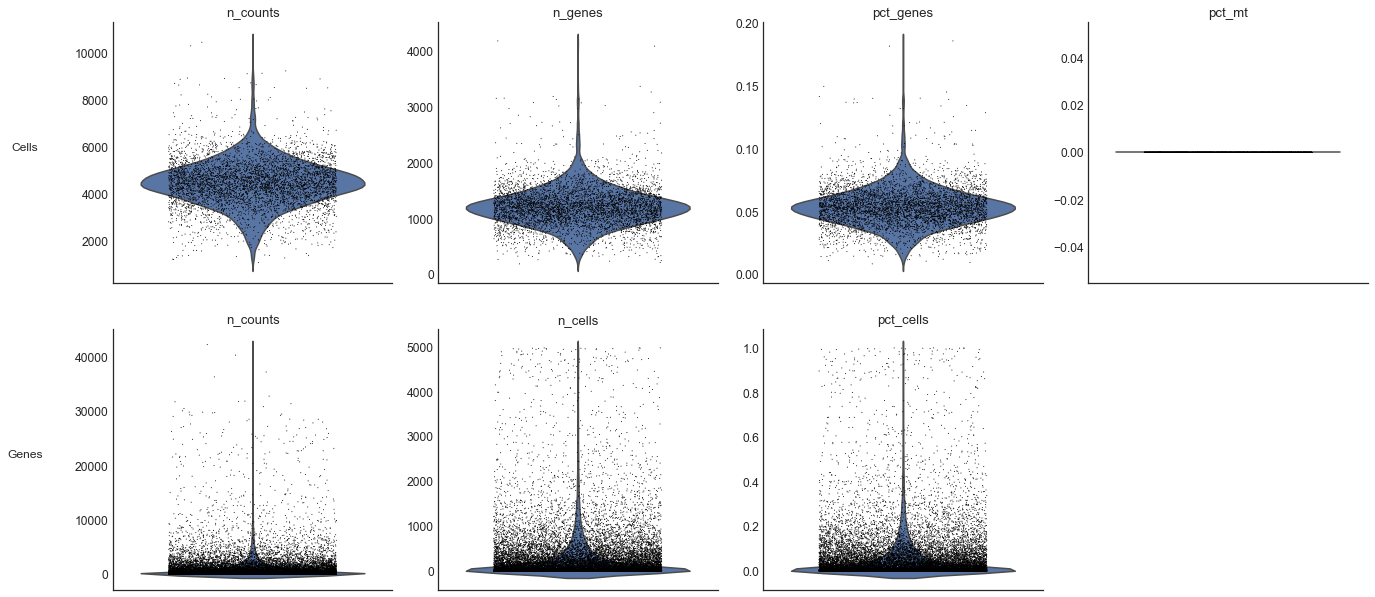

In [99]:
st.plot_qc(adata,jitter=0.3,)

/Users/jlabelle/opt/anaconda3/envs/stream/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jlabelle/opt/anaconda3/envs/stream/lib/python3.7/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/Users/jlabelle/opt/anaconda3/envs/stream/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histogra

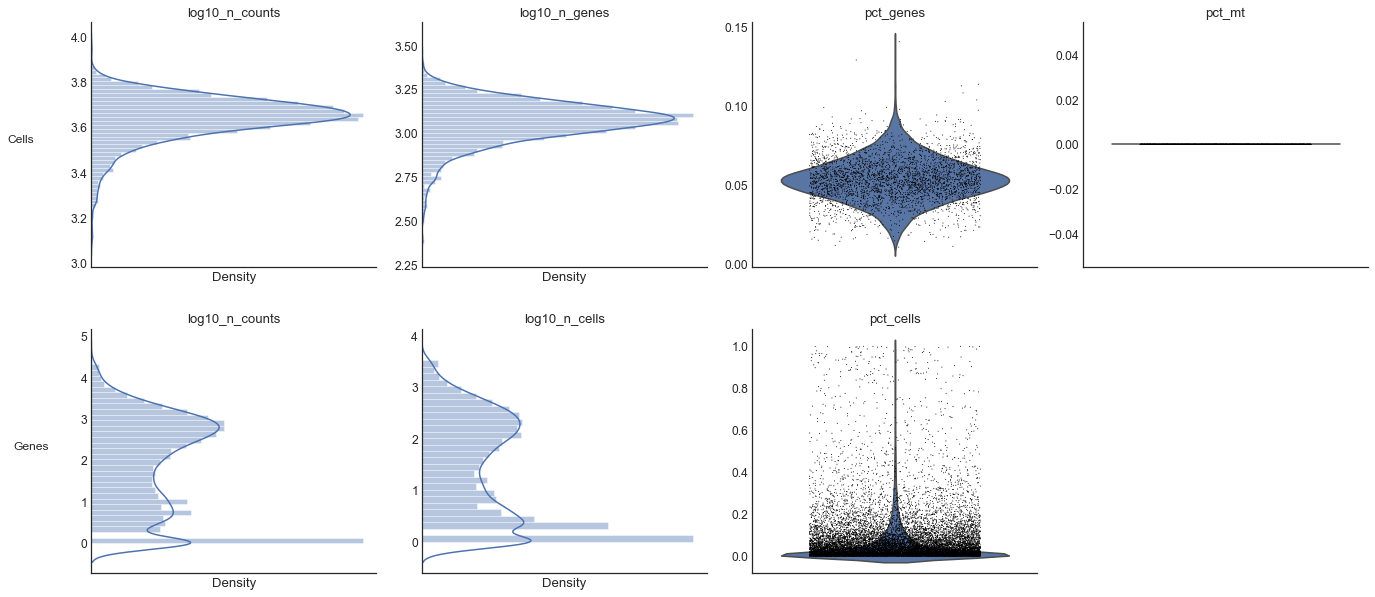

In [75]:
### histogram plots and log-scale are also supported
st.plot_qc(adata,jitter=0.3,log_scale=[0,1,4,5],hist_plot=[0,1,4,5]) 

In [15]:
#st.filter_cells(adata,min_n_features= 100)
#st.filter_features(adata,min_n_cells = 5)

filter cells based on min_n_features
after filtering out low-quality cells: 
76 cells, 2000 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
76 cells, 1909 genes


In [76]:
###Normalize gene expression based on library size  
#st.normalize(adata,method='lib_size')
###Logarithmize gene expression 
#st.log_transform(adata)
###Remove mitochondrial genes 
st.remove_mt_genes(adata)

#### Feature selection

Please check if the blue curve fits the points well. If not, please adjust the parameter **'loess_frac'** (usually by lowering it) until the blue curve fits well. 

/Users/jlabelle/opt/anaconda3/envs/stream/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:228: RuntimeWarning: invalid value encountered in true_divide
  frac=frac, it=it, delta=delta, given_xvals=False)


1123 variable genes are selected


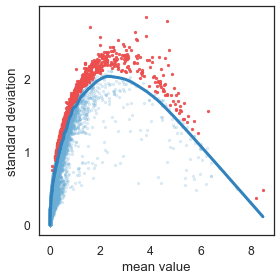

In [77]:
st.select_variable_genes(adata,loess_frac=0.01,percentile=95)

**Alternatively, user can also select top  principal components using all genes or variable genes:**
- use all genes   
`st.select_top_principal_components(adata,n_pc=15,first_pc=True)`
- use variable genes   
    - users need to first run `st.select_variable_genes(adata,loess_frac=0.01, n_genes=2000)`  
    - `st.select_top_principal_components(adata,feature='var_genes',n_pc=40,first_pc=True)`

#### Dimension reduction

In [78]:
st.dimension_reduction(adata,method='se',feature='var_genes',n_components=2,n_neighbors=15,n_jobs=4)

feature var_genes is being used ...
4 cpus are being used ...


> **Alternatively, using top principal components as features:**
`st.dimension_reduction(adata,method='se',feature='top_pcs',n_neighbors=15, n_components=2)`

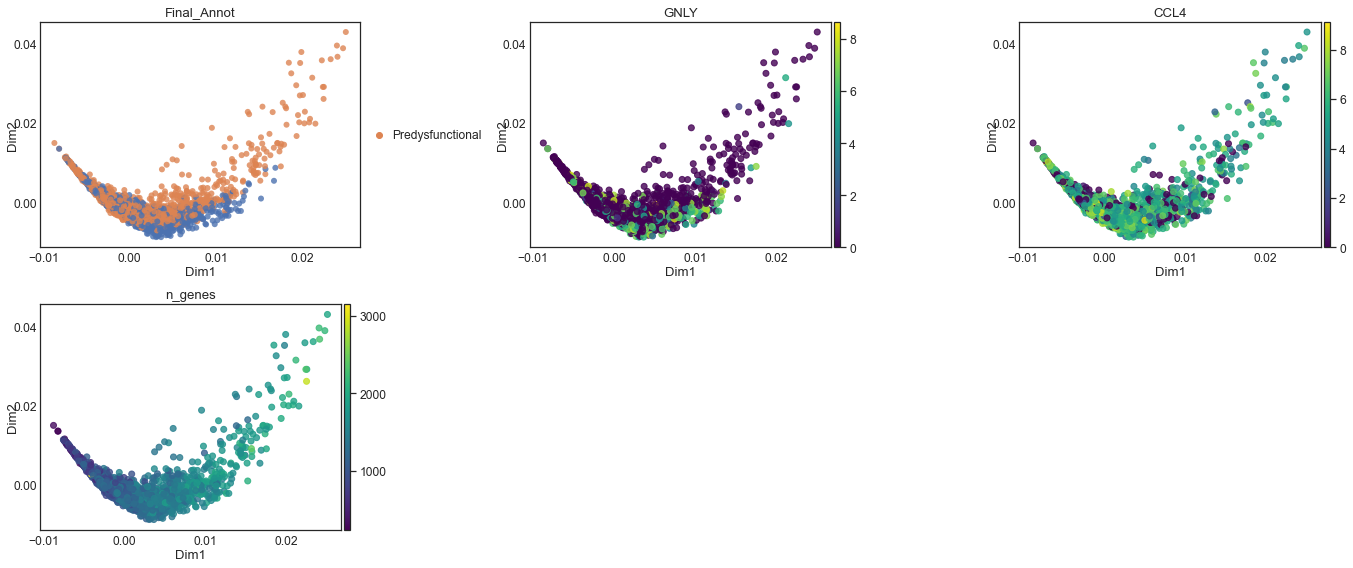

In [79]:
st.plot_dimension_reduction(adata,color=['Final_Annot','GNLY',"CCL4",'n_genes'],
                            n_components=2,show_graph=False,show_text=False)

#### Trajectory inference

In [80]:
st.seed_elastic_principal_graph(adata,n_clusters=10)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 10
Calculatng minimum spanning tree...
Number of initial branches: 1


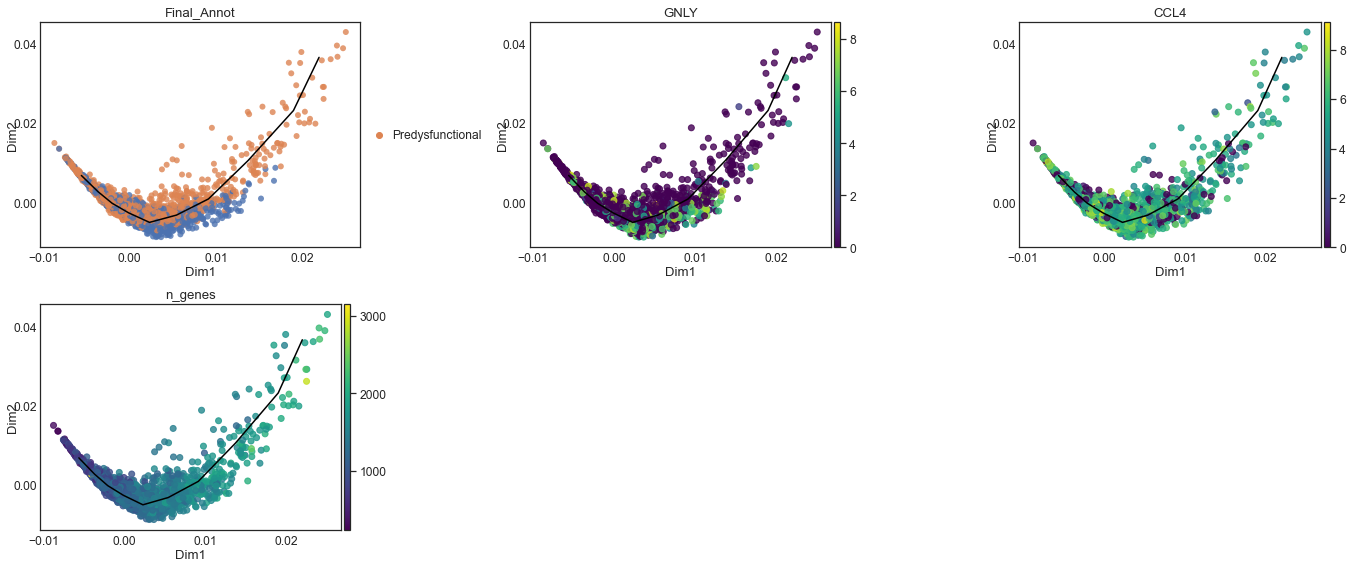

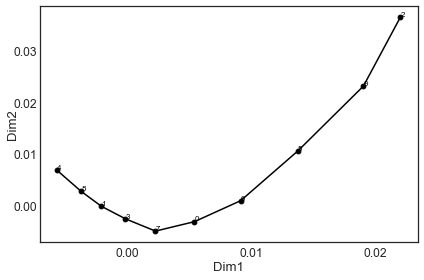

In [81]:
st.plot_dimension_reduction(adata,color=['Final_Annot','GNLY',"CCL4",'n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=True)

**`epg_alpha`, `epg_mu`, `epg_lambda` are the three most influential parameters for learning elastic principal graph.**  
- `epg_alpha`: penalizes spurious branching events. **The larger, the fewer branches the function will learn**. (by default, `epg_alpha=0.02`)
- `epg_mu`: penalizes the deviation from harmonic embedding, where harmonicity assumes that each node is the mean of its neighbor nodes. **The larger, the more edges the function will use to fit into points(cells)** (by default, `epg_mu=0.1`) 
- `epg_lambda`: penalizes the total length of edges. **The larger, the 'shorter' curves the function will use to fit into points(cells)** and the fewer points(cells) the curves will reach. (by default, `epg_lambda=0.02`)

> **'epg_trimmingradius'** can help get rid of noisy points (by defalut `epg_trimmingradius=Inf`)   
e.g. `st.elastic_principal_graph(adata,epg_trimmingradius=0.1)`  

In [102]:
st.elastic_principal_graph(adata,epg_alpha=0.01,epg_mu=0.05,epg_lambda=0.05)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 4973 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

0||50
	
2.085e-06
	
50
	
49
	
48
	
0
	
0
	
0
	
4.523e-07
	
4.083e-07
	
0.9839
	
0.9855
	
1.585e-06
	
4.85e-08
	
2.425e-06
	
0.0001212
	
0


15.436 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 1


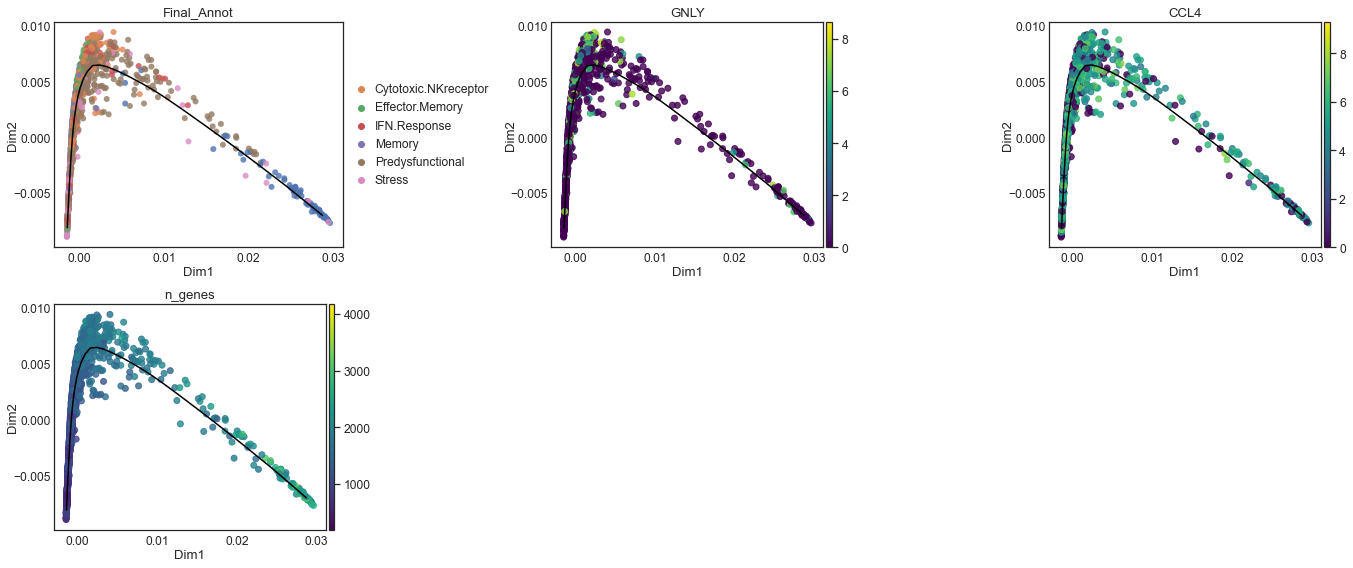

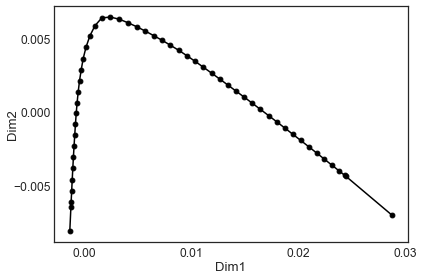

In [101]:
st.plot_dimension_reduction(adata,color=['Final_Annot','GNLY',"CCL4",'n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)

#### Adjusting trajectories (optional)

* Finetune branching event:  
```python
st.optimize_branching(adata,incr_n_nodes=30)
st.plot_dimension_reduction(adata,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
```
* Prune trivial branches:  
```python
st.prune_elastic_principal_graph(adata,epg_collapse_mode='EdgesNumber',epg_collapse_par=2)
st.plot_dimension_reduction(adata,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
```

* Shift branching node:  
```python
st.shift_branching(adata,epg_shift_mode='NodeDensity',epg_shift_radius=0.1,epg_shift_max=3)
st.plot_dimension_reduction(adata,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
```

In [97]:
## Load back in an analysis and create a new directory for figures
analysis_name = "cd8"
adata=st.read('./stream_result/stream_result_' + analysis_name + '.pkl')
figure_dir="figures/STREAM/" + analysis_name
if not os.path.isdir(figure_dir):
    os.mkdir(figure_dir)

Working directory is already specified as './stream_result' 
To change working directory, please run set_workdir(adata,workdir=new_directory)


Extending leaves with additional nodes ...
Number of branches after extending leaves: 1


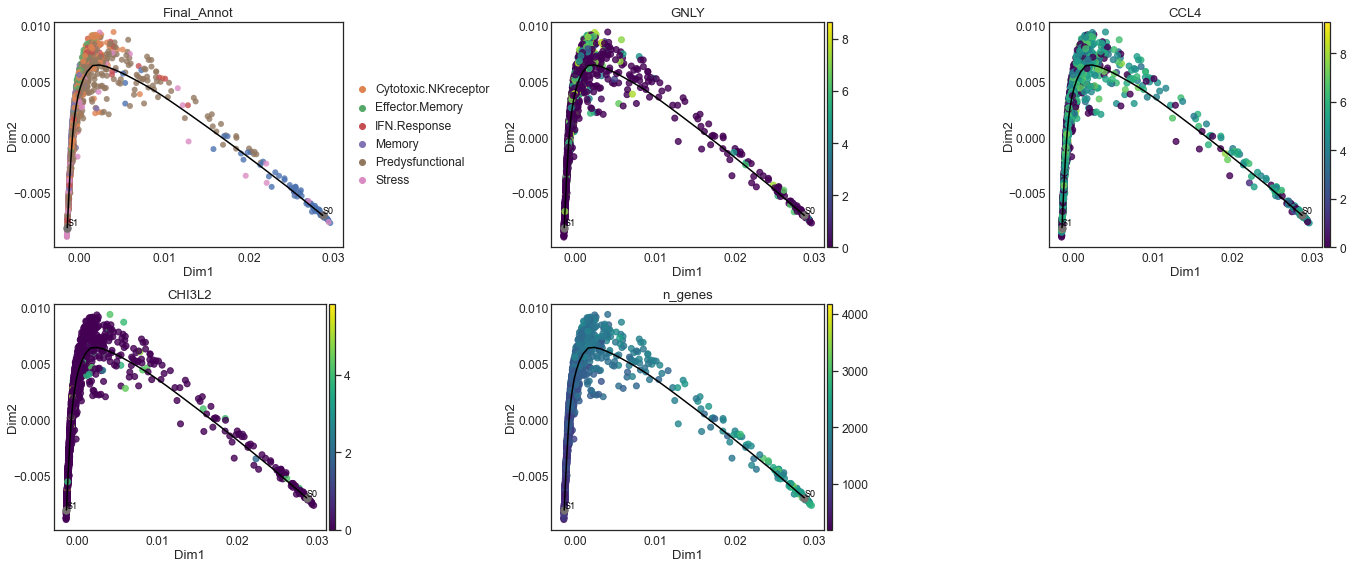

In [98]:
###Extend leaf branch to reach further cells 
st.extend_elastic_principal_graph(adata, epg_ext_mode='WeigthedCentroid',epg_ext_par=0.8)
st.plot_dimension_reduction(adata,color=['Final_Annot','GNLY',"CCL4","CHI3L2",'n_genes'],n_components=2,show_graph=True,show_text=True)
#st.plot_branches(adata,show_text=True)
plt.savefig(figure_dir + "/trajectory.png")

#### Trajectory visualization

##### flat tree

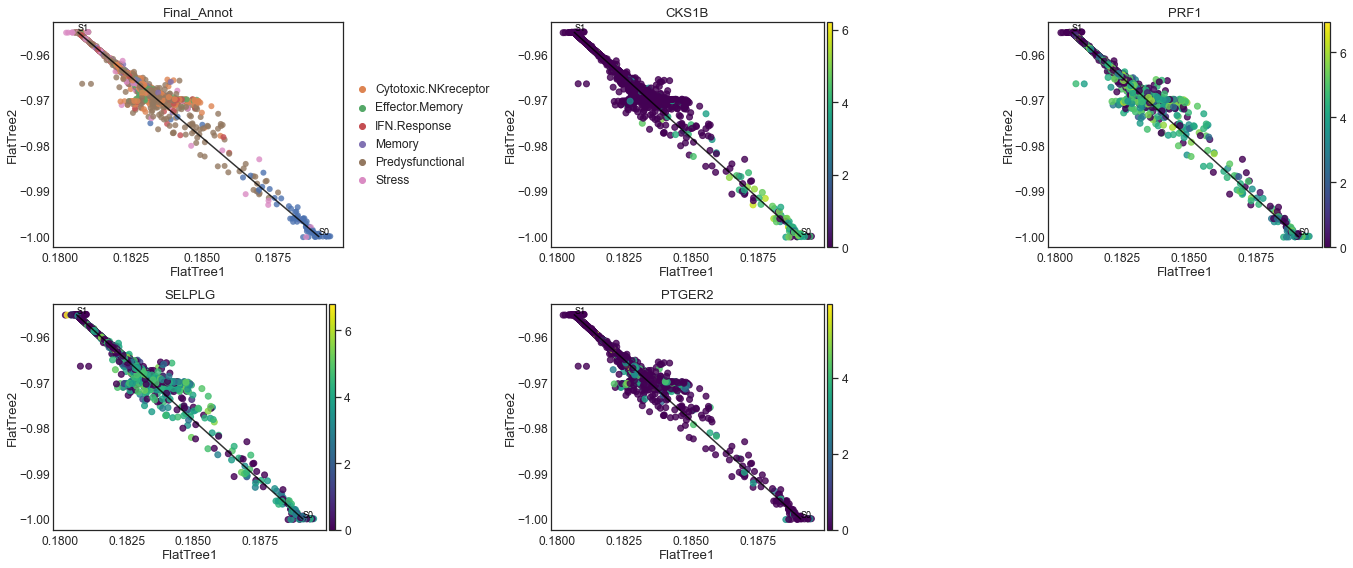

In [99]:
st.plot_flat_tree(adata,color=['Final_Annot',"CKS1B", "PRF1", "SELPLG", "PTGER2"],
                  dist_scale=0.5,show_graph=True,show_text=True)
plt.savefig(figure_dir + "/trajectory_flat.png")

##### stream plot at single cell level

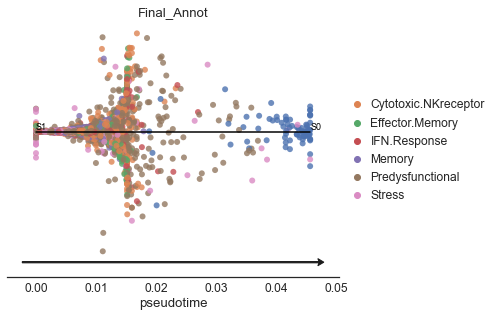

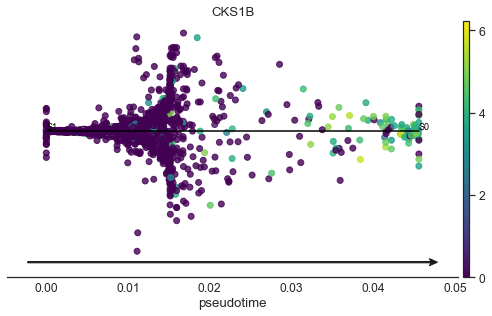

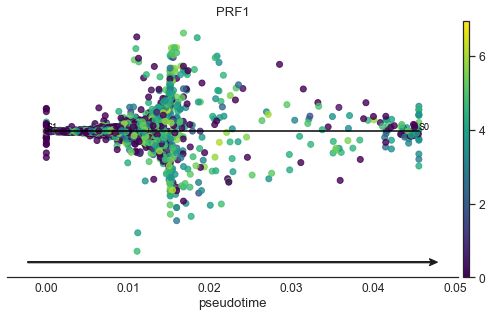

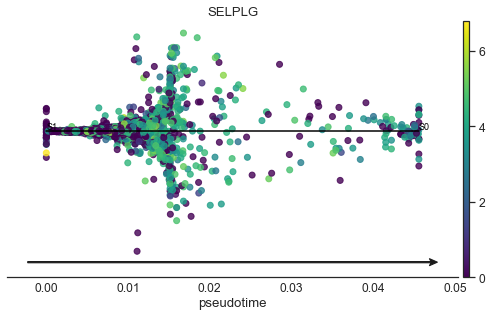

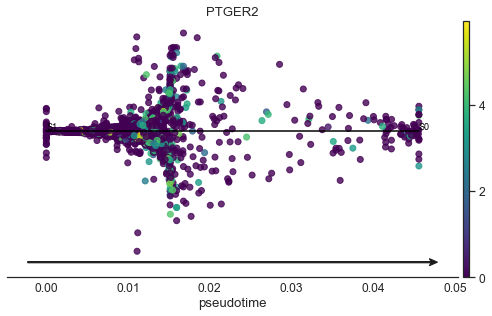

In [100]:
st.plot_stream_sc(adata,root='S1',color=['Final_Annot',"CKS1B", "PRF1", "SELPLG", "PTGER2"],
                  dist_scale=0.3,show_graph=True,show_text=True)
plt.savefig(figure_dir + "/stream_singlecell.png")

##### stream plots

In [ ]:
#st.plot_stream(adata,root='S3',color=['Final_Annot', 'MaxNature2020Program'])

**Some useful parameters to finetune the appearance of stream plots:**
* `dist_scale`: controls the width of STREAM plot branches.
* `factor_num_win`: controls the resolution of STREAM plot.
* `preference`: controls the order of branches
* `log_scale`: shows stream plot in log scale to zoom in on thin branches

In [ ]:
#st.plot_stream(adata,root='S2',color=['GNLY'],dist_scale=0.5,factor_num_win=1.5,preference=['S0'])

#### Marker genes detection

`marker_list` defines the list of genes to scan. If not specified, by default it uses all available genes. It might be time-consuming.  

Here we only include variable genes.

##### 1) detect marker genes for each leaf branch

In [90]:
st.detect_leaf_markers(adata,marker_list=adata.uns['var_genes'],cutoff_zscore=1.0,cutoff_pvalue=0.01,
                       root='S0',n_jobs=4)

Scanning the specified marker list ...
Filtering out markers that are expressed in less than 5 cells ...


/Users/jlabelle/opt/anaconda3/envs/stream/lib/python3.7/site-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


4 cpus are being used ...
1123 markers are being scanned ...


/Users/jlabelle/opt/anaconda3/envs/stream/lib/python3.7/site-packages/stream/core.py:3826: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_marker_detection['bfs_edges'] = df_marker_detection['branch_id']


There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

In [91]:
adata.uns['leaf_markers_all'].loc[["SELPLG", "PTGER2", "GNLY", "PRF1", "GZMB",  "PDCD1"]]


KeyError: "None of [Index(['SELPLG', 'PTGER2', 'GNLY', 'PRF1', 'GZMB', 'PDCD1'], dtype='object')] are in the [index]"

In [37]:
res=adata.uns['leaf_markers_all']
res[res['S0S2_pvalue'] != 1.0]

,zscore,H_statistic,H_pvalue,S3S0_pvalue,S0S1_pvalue,S0S2_pvalue
ACTG1,-1.375941,140.768182,0.0,1.0,0.0,0.0
MTHFD2,-1.406831,133.712644,0.0,1.0,0.0,0.0
SIT1,-1.413785,125.92764,0.0,1.0,0.0,0.0
CXCR3,-1.394327,123.342737,0.0,1.0,0.0,0.0
KPNA2,-1.408371,116.843671,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
CYTIP,1.300337,14.632047,0.000665,0.000438,1.0,0.002037
ALOX5AP,1.413866,13.999186,0.000912,0.000721,1.0,0.001617
PRF1,1.413441,13.541287,0.001147,0.00158,1.0,0.001014
GPR171,1.410559,12.74905,0.001704,0.001064,1.0,0.008403


In [59]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
print(adata.uns['leaf_markers'])

{('S3', 'S0'):              zscore H_statistic  H_pvalue S3S0_pvalue S0S1_pvalue S0S2_pvalue
ACTG1     -1.375941  140.768182  0.0       1.0         0.0         0.0       
MTHFD2    -1.406831  133.712644  0.0       1.0         0.0         0.0       
SIT1      -1.413785  125.92764   0.0       1.0         0.0         0.0       
CXCR3     -1.394327  123.342737  0.0       1.0         0.0         0.0       
KPNA2     -1.408371  116.843671  0.0       1.0         0.0         0.0       
APOBEC3C  -1.389471  115.172835  0.0       1.0         0.0         0.0       
C16orf80  -1.406439  112.836831  0.0       1.0         0.0         0.0       
LDHA      -1.382919  111.617502  0.0       1.0         0.0         0.0       
ENO1      -1.376233  110.537716  0.0       1.0         0.000006    0.0       
VIM       -1.410742  109.405775  0.0       1.0         0.0         0.0       
CORO1A    -1.383428  109.14083   0.0       1.0         0.000012    0.0       
PMAIP1    -1.412704  102.669574  0.0       1.0   

/Users/jlabelle/opt/anaconda3/envs/stream/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


##### 2) detect transition genes for each branch

In [72]:
st.detect_transition_markers(adata,marker_list=adata.uns['var_genes'],cutoff_spearman=0.4,cutoff_logfc=0.25,
                             root='S3',n_jobs=4)

Scanning the specified marker list ...
Importing precomputed scaled marker expression matrix ...
1123 markers are being scanned ...


/Users/jlabelle/opt/anaconda3/envs/stream/lib/python3.7/site-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


In [67]:
adata.uns['transition_markers'][('S0','S2')]

,stat,logfc,pval,qval
TUBA1B,0.743225,1.204437,6.645831e-30,5.256853e-27
TUBB,0.715531,1.140137,7.237930e-27,2.862601e-24
STMN1,0.709070,2.130808,3.286181e-26,8.664563e-24
PCNA,0.669976,2.755373,1.379321e-22,2.727607e-20
CKS1B,0.648355,4.854090,8.249579e-21,1.305083e-18
DNAJC9,0.633966,4.140611,1.050580e-19,1.385014e-17
TMEM106C,0.611659,3.213461,4.208769e-18,4.755910e-16
H2AFZ,0.605568,1.038926,1.096650e-17,1.084313e-15
TPI1,0.594361,0.603560,6.060646e-17,5.326635e-15
HMGB2,0.568905,1.007351,2.323181e-15,1.837636e-13


ValueError: min() arg is an empty sequence

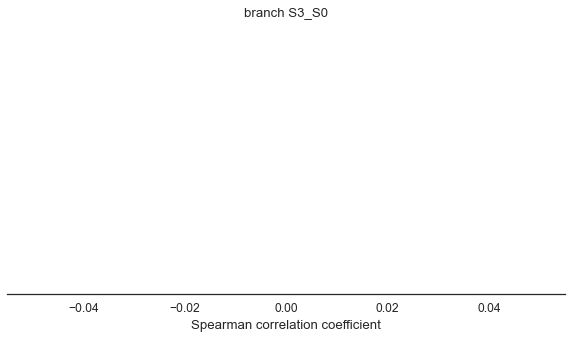

In [223]:
st.plot_transition_markers(adata,fig_size=(10,5))

##### 3) detect marker genes that are differentially expressed between pairs of branches

In [225]:
st.detect_de_markers(adata,marker_list=adata.uns['var_genes'],cutoff_zscore=1,cutoff_logfc=0.25,
                     root='S3',n_jobs=4)

Scanning the specified marker list ...
Importing precomputed scaled marker expression matrix ...
1123 markers are being scanned ...


/Users/jlabelle/opt/anaconda3/envs/stream/lib/python3.7/site-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


In [68]:
adata.uns['de_markers_greater'][(('S3', 'S0'), ('S0', 'S1'))]

,z_score,U,logfc,mean_up,mean_down,pval,qval
GZMK,3.429336,205024.0,0.289131,0.512976,0.419723,0.000605,0.001543
FGFBP2,2.962638,188976.5,2.344543,0.101175,0.019839,0.003051,0.005950
CX3CR1,2.623851,184907.0,2.234886,0.062438,0.013215,0.008697,0.014138
FGR,2.445092,183581.5,2.189103,0.059153,0.012925,0.014486,0.021845
RPS4Y1,2.069328,188628.5,0.579436,0.238906,0.159803,0.038521,0.050046
S1PR5,1.595901,181111.5,0.911791,0.081685,0.043379,0.110531,0.124914
CMC1,1.560527,182623.0,0.678108,0.137891,0.086128,0.118653,0.131712
ZNF32,1.331255,177511.0,1.121547,0.044653,0.020498,0.183148,0.194659
FCGR3A,1.223531,179824.0,0.608465,0.109975,0.072094,0.221160,0.231786
TATDN1,1.096275,177142.0,0.686266,0.052426,0.032561,0.273009,0.282340


In [65]:
adata.uns['de_markers_less']

{(('S3', 'S0'),
  ('S0',
   'S1')):             z_score         U     logfc   mean_up  mean_down          pval  \
 LGALS1    -9.843101  98700.0   1.463396  0.185177  0.511537   7.346152e-23   
 CAPG      -9.101217  124500.0  1.955758  0.077902  0.303070   8.940330e-20   
 ZNF683    -9.033765  107724.5  1.496390  0.153447  0.433720   1.659709e-19   
 CTSA      -8.863165  115092.5  1.575491  0.125402  0.374487   7.782810e-19   
 TOB1      -8.193625  94734.5   0.740159  0.427804  0.715067   2.535847e-16   
 ICOS      -7.373435  120715.0  1.251975  0.131245  0.313014   1.663756e-13   
 SIT1      -7.330670  116088.0  1.167835  0.206906  0.465446   2.291166e-13   
 CLIC3     -7.194145  128308.0  1.426525  0.113134  0.304616   6.289100e-13   
 VIM       -7.047220  104747.5  0.561612  0.553340  0.817073   1.825959e-12   
 GPN1      -7.036371  135091.0  1.548098  0.078774  0.230806   1.974451e-12   
 MTHFD2    -6.866371  128469.0  1.399540  0.112731  0.297892   6.589184e-12   
 FKBP11    -6.842

In [228]:
adata.uns['de_markers_less'][(('S0', 'S1'), ('S0', 'S2'))]

,z_score,U,logfc,mean_up,mean_down,pval,qval
STMN1,-7.349807,4348.0,1.812131,0.160373,0.564587,1.997004e-13,4.526541e-11
CD74,-7.018715,4422.0,0.257094,0.721204,0.862057,2.251817e-12,3.828088e-10
CKS1B,-6.940670,5258.0,2.865732,0.050147,0.367843,3.928990e-12,5.343426e-10
HLA-DRA,-6.670889,4728.0,1.082357,0.303456,0.643286,2.556527e-11,2.897397e-09
IDH2,-5.931062,5161.0,0.795682,0.365885,0.635607,3.024457e-09,1.869664e-07
PCNA,-5.873998,5535.0,1.498270,0.154950,0.438542,4.276655e-09,2.423438e-07
TUBB,-5.749863,5302.0,0.728148,0.378145,0.626812,8.974082e-09,4.358840e-07
FABP5,-5.729764,5707.5,1.682821,0.118298,0.380644,1.011064e-08,4.583492e-07
COX5A,-5.657859,5479.0,1.277902,0.193900,0.470853,1.540162e-08,6.545687e-07
MAD2L1,-5.464340,6187.0,2.395810,0.051773,0.273637,4.672929e-08,1.869172e-06


ValueError: The number of FixedLocator locations (15), usually from a call to set_ticks, does not match the number of ticklabels (902).

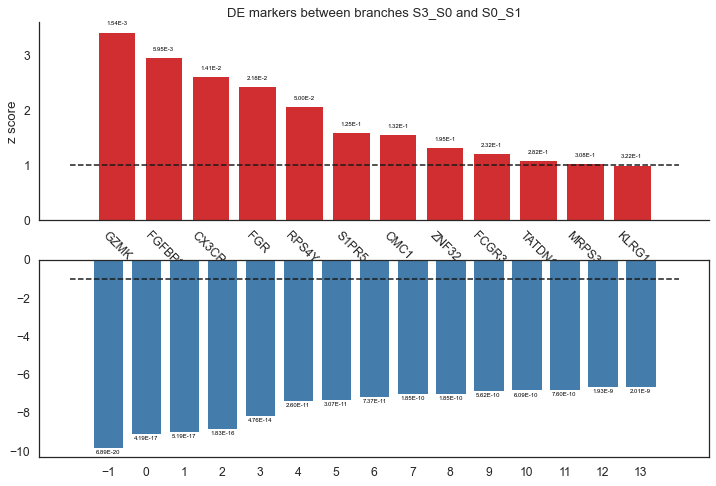

In [69]:
st.plot_de_markers(adata)

##### 4) detect cell population-specific markers

```python
st.detect_markers(adata,ident='label',marker_list=adata.uns['var_genes'],cutoff_zscore=1.0,cutoff_pvalue=0.01)
```

#### Save results

In [96]:
filename='stream_result_cd8' + analysis_name + '.pkl'
st.write(adata,file_name=filename)

To read back the saved `.pkl` file
```python
adata = st.read('./stream_result/stream_result.pkl')
```